In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [350]:
chart_size= [10,10]
chart_size2= [20,10]

In [3]:
proj="SL1"

## LISTAS

In [60]:
cover         = ['CE', 'CQ']

fresh_clean   = ['HC', 'HF', 'IC', 'IF']
str_ore       = ['HC', 'HF', 'IC', 'IF']
ore_rocks     = ['CE', 'HC', 'HF', 'IC', 'IF']
basin_rocks   = ['IC', 'IF', 'HF', 'HC', 'HMN']
mineralized   = ['CE', 'HC', 'HF', 'HMN', 'IC', 'IF']
waste         = ['CQ', 'MD', 'MS', 'MSD', 'BR']

model_rocks = ['CE', 'HC', 'HF', 'HMN', 'FMN', 'JP', 'CQ', 'MD', 'MSD', 'MS', 'BR' , 'QT']

teores_gl     = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL']
faixas        = ['g1', 'g1a', 'g1b', 'g2', 'g3']
param_event   = ['FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', 'G1', 'G1A', 'G1B', 'G2', 'G3']

not_countable = ['FURO','NA','DE','ATE','CLV','CLM','FLX_AN','FLX_AN_OR','DA_ANA','DA_SAM','d_agru','tipo_am','global','mass_t','status']

gran_batch = ['G1A', 'G1B', 'G2', 'G3']

set_g1a = ['G1A','FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A']
set_g1b = ['G1B','FE1B', 'SI1B', 'P1B', 'AL1B', 'MN1B','PF1B', 'TI1B', 'MG1B', 'CA1B']
set_g2 = ['G2','FE2', 'SI2', 'P2', 'AL2','MN2', 'PF2', 'TI2', 'MG2', 'CA2']
set_g3 = ['G3','FE3', 'SI3', 'P3', 'AL3', 'MN3','PF3', 'TI3', 'MG3', 'CA3']

v_krig = [ 'FEGL', 'SIGL', 'PGL', 'ALGL', 'MNGL', 'PFGL', 'TIGL', 'MGGL', 'CAGL', \
            'G1A', 'G1B', 'G2', 'G3','FE1A', 'SI1A', 'P1A', 'AL1A', 'MN1A', 'PF1A', 'TI1A', 'MG1A', 'CA1A', \
            'FE1B', 'SI1B', 'P1B', 'AL1B', 'MN1B','PF1B', 'TI1B', 'MG1B', 'CA1B', \
            'FE2', 'SI2', 'P2', 'AL2','MN2', 'PF2', 'TI2', 'MG2', 'CA2', \
            'FE3', 'SI3', 'P3', 'AL3', 'MN3','PF3', 'TI3', 'MG3', 'CA3']

litocolor=dict(AG= "#FFEEBB",AT= "#777777",CE= "#00AA00",CH= "#FFFF00",CQ= "#77FFBB", \
               FMN= "#7766DD",HC= "#EE0000",HF= "#EE00DD",HMN= "#995555",IC= "#004488", \
               LT= "#99BB99",MD= "#CC8800",MS= "#99BB99",MSD= "#DDCC77",QT= "#776655", \
               SO= "#336611",SR= "#FFFFFF",XI= "#CC8800", IF= "#00B0F0")


valecolor= dict(VERDE='#007E7A',LARANJA='#ECB11F',CINZA='#6F7070',BRANCO='#FFFFFF', \
                LARANJA2='#E37222',VERMELHO='#BB133E',AZUL='#3D7EDB',AZUL2='#00B0CA', \
                VERDE2='#69BE28',AMARELO='#DFDF00')

address = "C:/DADOS/ANDERSON/PROJ_VULCAN/SL1_1221/sl1_202111/"

#bmf origin
bmf_minx = 647768.750000 
bmf_miny = 9337017.000000 
bmf_minz = -100.000000

## LOAD DATA

###### LOADING SAMPLES...

In [198]:
fso = pd.read_csv(address+'sl1_2021_fso_assay.csv', low_memory=False, na_values='-99', encoding="latin1")
fso.rename(columns=str.upper, inplace=True)

In [199]:
fac = pd.read_csv(address+'sl1flp_fac_assay.csv', low_memory=False, na_values='-99', encoding="latin1")
fac.rename(columns=str.upper, inplace=True)

In [200]:
cac=  pd.read_csv(address+'sl1flp_cac_entry.csv', low_memory=False, na_values='-99', encoding="latin1")
cac.rename(columns=str.upper, inplace=True)

###### LOADING BLOCK MODELS

###### detailed 5x5x5 size variable

In [201]:
bmf555 = pd.read_csv(address + 'bmf_var_5_5_5.csv', low_memory=False, na_values='-99', encoding="latin1", skiprows=[1,2,3,4])
bmf555.rename(columns=str.upper, inplace=True)
bmf555['LITO']=bmf555['LITO'].str.upper()

###### 5x5x5 fixed size

In [202]:
bmf555_fix = pd.read_csv(address + 'bmf_fix_5_5_5.csv', low_memory=False, na_values='-99', encoding="latin1", skiprows=[1,2,3,4])
bmf555_fix.rename(columns=str.upper, inplace=True)
bmf555_fix['LITO']=bmf555_fix['LITO'].str.upper()

###### 10x10x5

In [219]:
bmf10105 = pd.read_csv(address + 'bmf_fix_10_10_5.csv', low_memory=False, na_values='-99', encoding="latin1", skiprows=[1,2,3,4])
bmf10105.rename(columns=str.upper, inplace=True)
bmf10105['LITO']=bmf10105['LITO'].str.upper()

###### 25x25x10

In [220]:
bmf252510 = pd.read_csv(address + 'bmf_fix_25_25_10.csv', low_memory=False, na_values='-99', encoding="latin1", skiprows=[1,2,3,4])
bmf252510.rename(columns=str.upper, inplace=True)
bmf252510['LITO']=bmf252510['LITO'].str.upper()

In [221]:
bmf555.head(5)

CENTROID_X  CENTROID_Y  CENTROID_Z  DIM_X  DIM_Y  DIM_Z  VOLUME  DENS_N  \
0   650011.25  9337490.75       -99.5    5.0    2.5    1.0   12.50     NaN   
1   650015.00  9337490.75       -99.5    2.5    2.5    1.0    6.25     NaN   
2   649791.25  9337510.75       -99.5    5.0    2.5    1.0   12.50     NaN   
3   649782.50  9337515.75       -97.0    2.5    2.5    2.0   12.50     NaN   
4   649771.25  9337515.75       -99.5    5.0    2.5    1.0   12.50     NaN   

   TOPO FF_EXPAND LITO  MINE  IR  IK  ORE  PASS  
0     1        ff   IC   NaN NaN NaN  1.0  46.0  
1     1        ff   IC   NaN NaN NaN  1.0  46.0  
2     1        ff   IC   NaN NaN NaN  1.0  41.0  
3     1        ff   IC   NaN NaN NaN  1.0  41.0  
4     1        ff   IC   NaN NaN NaN  1.0  41.0

In [222]:
bmf555.columns

Index(['CENTROID_X', 'CENTROID_Y', 'CENTROID_Z', 'DIM_X', 'DIM_Y', 'DIM_Z',
       'VOLUME', 'DENS_N', 'TOPO', 'FF_EXPAND', 'LITO', 'MINE', 'IR', 'IK',
       'ORE', 'PASS'],
      dtype='object')

In [307]:
bmf555.LITO.unique()

array(['IC', 'HC', 'IF', 'HF', 'CE'], dtype=object)

###### GETTING CORRIDOR INDEXES

In [223]:
# MODEL ORIGIN:

bmf_minx = 647768.750000 
bmf_miny = 9337017.000000 
bmf_minz = -100.000000

corridor_size = 50

In [334]:
bmf555['PASS']= round((bmf555['CENTROID_X'] - bmf_minx)/corridor_size) + 1
bmf555_fix['PASS']=round((bmf555_fix['CENTROID_X'] - bmf_minx)/corridor_size) + 1
bmf10105['PASS']= round((bmf10105['CENTROID_X'] - bmf_minx)/corridor_size) + 1
bmf252510['PASS']= round((bmf252510['CENTROID_X'] - bmf_minx)/corridor_size) + 1


In [335]:
bmf555.head(5)

CENTROID_X  CENTROID_Y  CENTROID_Z  DIM_X  DIM_Y  DIM_Z  VOLUME  DENS_N  \
0   650011.25  9337490.75       -99.5    5.0    2.5    1.0   12.50     NaN   
1   650015.00  9337490.75       -99.5    2.5    2.5    1.0    6.25     NaN   
2   649791.25  9337510.75       -99.5    5.0    2.5    1.0   12.50     NaN   
3   649782.50  9337515.75       -97.0    2.5    2.5    2.0   12.50     NaN   
4   649771.25  9337515.75       -99.5    5.0    2.5    1.0   12.50     NaN   

   TOPO FF_EXPAND LITO  MINE  IR  IK  ORE  PASS  
0     1        ff   IC   NaN NaN NaN  1.0  46.0  
1     1        ff   IC   NaN NaN NaN  1.0  46.0  
2     1        ff   IC   NaN NaN NaN  1.0  41.0  
3     1        ff   IC   NaN NaN NaN  1.0  41.0  
4     1        ff   IC   NaN NaN NaN  1.0  41.0

In [277]:
vol_tot555 = pd.DataFrame(bmf555.groupby('LITO').VOLUME.sum())
vol_tot555['TAG']='555_VAR'
vol_tot555.reset_index(inplace=True)
vol_tot555.set_index(['LITO','TAG'], inplace=True)
#vol_tot555.set_index(['TAG'], inplace=True)
vol_tot555

vol_tot555_fix = pd.DataFrame(bmf555_fix.groupby('LITO').VOLUME.sum())
vol_tot555_fix['TAG']='555_FIX'
vol_tot555_fix.reset_index(inplace=True)
vol_tot555_fix.set_index(['LITO','TAG'], inplace=True)
#vol_tot555_fix.rename(columns={'VOLUME':'VOL_555_FIX'}, inplace=True)
vol_tot10105 = pd.DataFrame(bmf10105.groupby('LITO').VOLUME.sum())
vol_tot10105['TAG']='10105'
vol_tot10105.reset_index(inplace=True)
vol_tot10105.set_index(['LITO','TAG'], inplace=True)
#vol_tot10105.rename(columns={'VOLUME':'VOL_10105'}, inplace=True)
vol_tot252510 = pd.DataFrame(bmf252510.groupby('LITO').VOLUME.sum())
vol_tot252510['TAG']='252510'
vol_tot252510.reset_index(inplace=True)
vol_tot252510.set_index(['LITO','TAG'], inplace=True)
#vol_tot252510.rename(columns={'VOLUME':'VOL_252510'}, inplace=True)

In [382]:
# format string pattern
format_dict = {
    'VOLUME': '{:,.0f}',
    'VOL_555_FIX': '{:,.0f}',
    'VOL_10105': '{:,.0f}',
    'VOL_252510': '{:,.0f}'    
}

# our dataframe containing the data is called contribution
vol_tot555.head(30).style.format(format_dict)

In [383]:
vol_tot555_fix.head(30).style.format(format_dict)

In [384]:
vol_tot10105.head(30).style.format(format_dict)

In [385]:
vol_tot252510.head(30).style.format(format_dict)

In [278]:
vol_tot555

VOLUME
LITO TAG                  
CE   555_VAR  2.305202e+08
HC   555_VAR  6.553845e+07
HF   555_VAR  8.548618e+07
IC   555_VAR  5.117861e+08
IF   555_VAR  6.207836e+07

In [237]:
bmf10105['LITO'].unique()

array(['IC', 'HC', 'IF', 'HF', 'CE'], dtype=object)

In [238]:
vol_tot555_fix

VOLUME      TAG
LITO                      
CE    230445875.0  555_FIX
HC     65561250.0  555_FIX
HF     85483125.0  555_FIX
IC    511743750.0  555_FIX
IF     62091750.0  555_FIX

######  merging all 4 tables

In [294]:
# compile the list of dataframes you want to merge


data_frames = [vol_tot555, vol_tot555_fix, vol_tot10105, vol_tot252510]

from functools import reduce

#df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['LITO'], how='outer'), data_frames)

#df_merged = pd.merge(data_frames, how='left', left_index=True, right_index=True)

df_merged = vol_tot555.append(vol_tot555_fix)

df_merged = df_merged.append(vol_tot10105)

df_merged = df_merged.append(vol_tot252510)

In [295]:
df_merged

VOLUME
LITO TAG                  
CE   555_VAR  2.305202e+08
HC   555_VAR  6.553845e+07
HF   555_VAR  8.548618e+07
IC   555_VAR  5.117861e+08
IF   555_VAR  6.207836e+07
CE   555_FIX  2.304459e+08
HC   555_FIX  6.556125e+07
HF   555_FIX  8.548312e+07
IC   555_FIX  5.117438e+08
IF   555_FIX  6.209175e+07
CE   10105    2.305170e+08
HC   10105    6.551050e+07
HF   10105    8.544900e+07
IC   10105    5.117520e+08
IF   10105    6.206300e+07
CE   252510   2.302812e+08
HC   252510   6.571250e+07
HF   252510   8.547500e+07
IC   252510   5.120250e+08
IF   252510   6.220625e+07

In [297]:
df_merged

# format string pattern
format_dict = {
    'VOLUME': '{:,.0f}',
    'VOL_555_FIX': '{:,.0f}',
    'VOL_10105': '{:,.0f}',
    'VOL_252510': '{:,.0f}'    
}

# our dataframe containing the data is called contribution
df_merged.head(30).style.format(format_dict)

In [314]:
df_CE = df_merged.loc['CE']
df_CE.reset_index(inplace=True)
df_HC = df_merged.loc['HC']
df_HF = df_merged.loc['HF']
df_IC = df_merged.loc['IC']
df_IF = df_merged.loc['IF']

In [315]:
df_CE

TAG        VOLUME
0  555_VAR  2.305202e+08
1  555_FIX  2.304459e+08
2    10105  2.305170e+08
3   252510  2.302812e+08

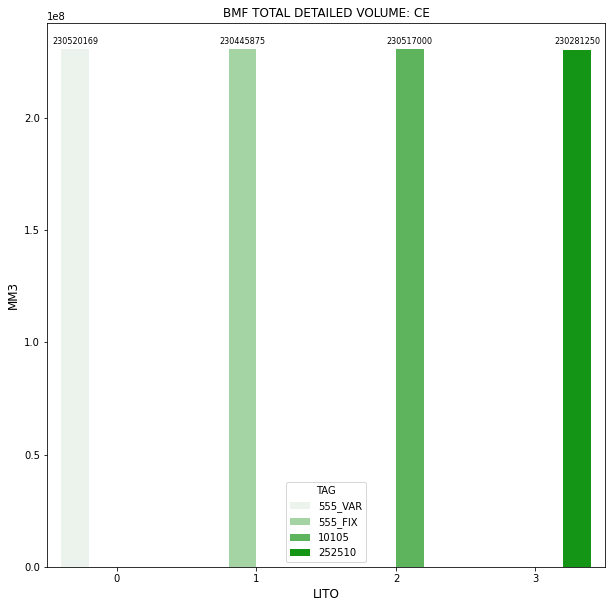

In [322]:
ROCK = 'CE'

df = df_merged.loc[ROCK]
df.reset_index(inplace=True)

fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=df.index, y=df.VOLUME, hue=df.TAG, color="#00AA00")
#sea.barplot(x=df_merged.index, y=df_merged.VOL_555_FIX, color=valecolor['VERDE'])
#sea.barplot(x=df_merged.index, y=df_merged.VOL_10105, color=valecolor['AZUL'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('BMF TOTAL DETAILED VOLUME: ' + ROCK)
plt.ylabel('MM3', fontsize=12)
plt.xlabel('LITO', fontsize=12)

plt.show()

fig.savefig(proj + '_BMF_TOTAL_VOLUME_'+ROCK+'.jpeg', transparent=None)

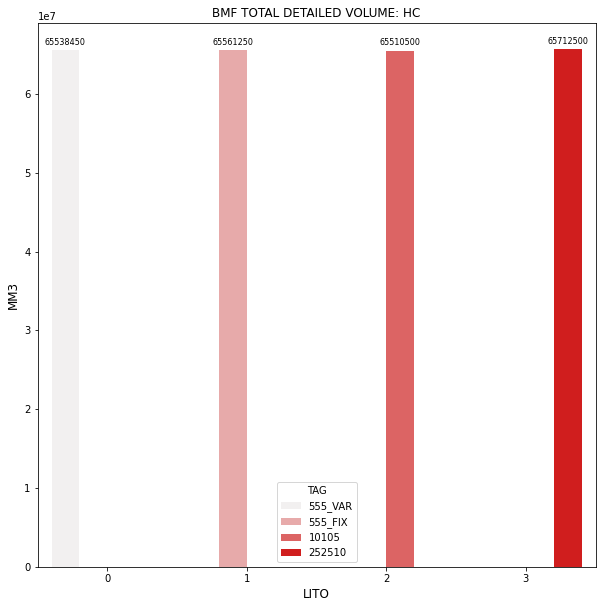

In [325]:
ROCK = 'HC'

df = df_merged.loc[ROCK]
df.reset_index(inplace=True)

fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=df.index, y=df.VOLUME, hue=df.TAG, color="#EE0000")
#sea.barplot(x=df_merged.index, y=df_merged.VOL_555_FIX, color=valecolor['VERDE'])
#sea.barplot(x=df_merged.index, y=df_merged.VOL_10105, color=valecolor['AZUL'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('BMF TOTAL DETAILED VOLUME: ' + ROCK)
plt.ylabel('MM3', fontsize=12)
plt.xlabel('LITO', fontsize=12)

plt.show()

fig.savefig(proj + '_BMF_TOTAL_VOLUME_'+ROCK+'.jpeg', transparent=None)

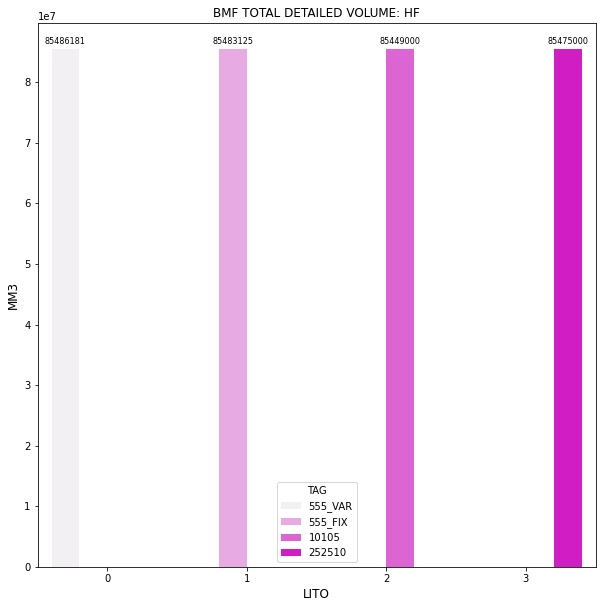

In [326]:
ROCK = 'HF'

df = df_merged.loc[ROCK]
df.reset_index(inplace=True)

fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=df.index, y=df.VOLUME, hue=df.TAG, color="#EE00DD")
#sea.barplot(x=df_merged.index, y=df_merged.VOL_555_FIX, color=valecolor['VERDE'])
#sea.barplot(x=df_merged.index, y=df_merged.VOL_10105, color=valecolor['AZUL'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('BMF TOTAL DETAILED VOLUME: ' + ROCK)
plt.ylabel('MM3', fontsize=12)
plt.xlabel('LITO', fontsize=12)

plt.show()

fig.savefig(proj + '_BMF_TOTAL_VOLUME_'+ROCK+'.jpeg', transparent=None)

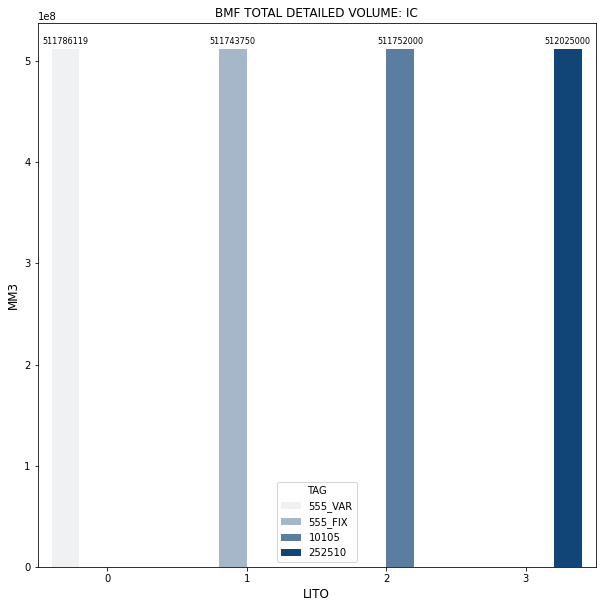

In [327]:
ROCK = 'IC'

df = df_merged.loc[ROCK]
df.reset_index(inplace=True)

fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=df.index, y=df.VOLUME, hue=df.TAG, color="#004488")
#sea.barplot(x=df_merged.index, y=df_merged.VOL_555_FIX, color=valecolor['VERDE'])
#sea.barplot(x=df_merged.index, y=df_merged.VOL_10105, color=valecolor['AZUL'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('BMF TOTAL DETAILED VOLUME: ' + ROCK)
plt.ylabel('MM3', fontsize=12)
plt.xlabel('LITO', fontsize=12)

plt.show()

fig.savefig(proj + '_BMF_TOTAL_VOLUME_'+ROCK+'.jpeg', transparent=None)

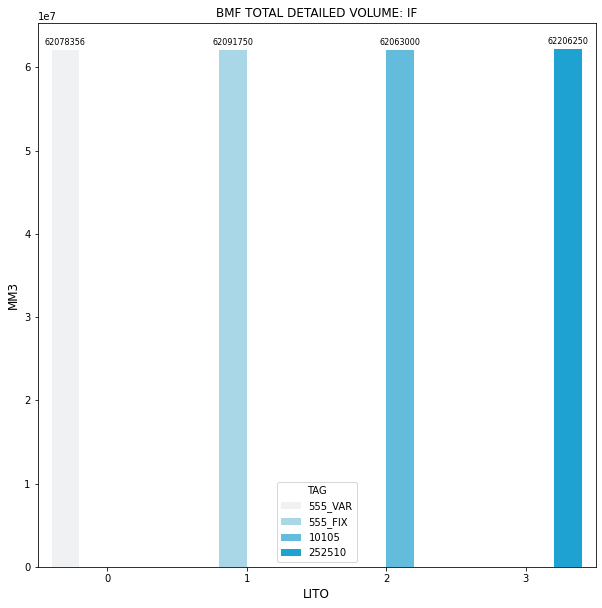

In [328]:
ROCK = 'IF'

df = df_merged.loc[ROCK]
df.reset_index(inplace=True)

fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=df.index, y=df.VOLUME, hue=df.TAG, color="#00B0F0")
#sea.barplot(x=df_merged.index, y=df_merged.VOL_555_FIX, color=valecolor['VERDE'])
#sea.barplot(x=df_merged.index, y=df_merged.VOL_10105, color=valecolor['AZUL'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('BMF TOTAL DETAILED VOLUME: ' + ROCK)
plt.ylabel('MM3', fontsize=12)
plt.xlabel('LITO', fontsize=12)

plt.show()

fig.savefig(proj + '_BMF_TOTAL_VOLUME_'+ROCK+'.jpeg', transparent=None)

###### GETTING SWATH PLOT TABLES

In [344]:
SW_555 = pd.DataFrame(bmf555.groupby(['LITO', 'PASS']).VOLUME.sum())
SW_555['TAG']='555_VAR'

SW_555_FIX = pd.DataFrame(bmf555_fix.groupby(['LITO', 'PASS']).VOLUME.sum())
SW_555_FIX['TAG']='555_FIX'

SW_10105 = pd.DataFrame(bmf10105.groupby(['LITO', 'PASS']).VOLUME.sum())
SW_10105['TAG']='10105_FIX'

SW_252510 = pd.DataFrame(bmf252510.groupby(['LITO', 'PASS']).VOLUME.sum())
SW_252510['TAG']='252510_FIX'



In [346]:
SW_ALL = SW_555.append(SW_555_FIX)
SW_ALL = SW_ALL.append(SW_10105)
SW_ALL = SW_ALL.append(SW_252510)


In [347]:
SW_ALL

VOLUME         TAG
LITO PASS                          
CE   19.0       1231.25     555_VAR
     20.0     143631.25     555_VAR
     21.0     475656.25     555_VAR
     22.0     632393.75     555_VAR
     23.0     639081.25     555_VAR
     24.0     510293.75     555_VAR
     25.0     459818.75     555_VAR
     26.0     428737.50     555_VAR
     27.0     811925.00     555_VAR
     28.0     957693.75     555_VAR
     29.0     975806.25     555_VAR
     30.0    1139131.25     555_VAR
     31.0    1489156.25     555_VAR
     32.0    1779475.00     555_VAR
     33.0    1902112.50     555_VAR
     34.0    1906281.25     555_VAR
     35.0    1844575.00     555_VAR
     36.0    2132037.50     555_VAR
     37.0    2466037.50     555_VAR
     38.0    2780400.00     555_VAR
     39.0    2805493.75     555_VAR
     40.0    2887425.00     555_VAR
     41.0    3298818.75     555_VAR
     42.0    3492525.00     555_VAR
     43.0    3410200.00     555_VAR
     44.0    2860712.50     555_VAR
     45.0    2352812.50     555_VAR
     46.0    1991537.50     555_VAR
     47.0    1980143.75     555_VAR
     48.0    2145031.25     555_VAR
     49.0    2158143.75     555_VAR
     50.0    2219293.75     555_VAR
     51.0    2165162.50     555_VAR
     52.0    1969200.00     555_VAR
     53.0    1942106.25     555_VAR
     54.0    2676300.00     555_VAR
     55.0    3180618.75     555_VAR
     56.0    3737743.75     555_VAR
     57.0    4322493.75     555_VAR
     58.0    4788243.75     555_VAR
     59.0    4934650.00     555_VAR
     60.0    4713100.00     555_VAR
     61.0    4639825.00     555_VAR
     62.0    4877675.00     555_VAR
     63.0    4862887.50     555_VAR
     64.0    4529375.00     555_VAR
     65.0    4073787.50     555_VAR
     66.0    4226031.25     555_VAR
     67.0    4551662.50     555_VAR
     68.0    4896618.75     555_VAR
     69.0    5271668.75     555_VAR
     70.0    5344893.75     555_VAR
     71.0    5075287.50     555_VAR
     72.0    4936681.25     555_VAR
     73.0    4660087.50     555_VAR
     74.0    4142200.00     555_VAR
     75.0    3922781.25     555_VAR
     76.0    3364900.00     555_VAR
     77.0    2758193.75     555_VAR
     78.0    2645881.25     555_VAR
     79.0    2548137.50     555_VAR
     80.0    2215000.00     555_VAR
     81.0    1588306.25     555_VAR
     82.0    1208512.50     555_VAR
     83.0    1099537.50     555_VAR
     84.0    1094475.00     555_VAR
     85.0    1070931.25     555_VAR
     86.0    1016650.00     555_VAR
     87.0     993393.75     555_VAR
     88.0     884325.00     555_VAR
     89.0     719150.00     555_VAR
     90.0     770600.00     555_VAR
     91.0     981668.75     555_VAR
     92.0    1199143.75     555_VAR
     93.0    1457706.25     555_VAR
     94.0    1762225.00     555_VAR
     95.0    1653187.50     555_VAR
     96.0    1579325.00     555_VAR
     97.0    1790818.75     555_VAR
     98.0    2192568.75     555_VAR
     99.0    2482762.50     555_VAR
     100.0   2607137.50     555_VAR
     101.0   2639775.00     555_VAR
     102.0   2688137.50     555_VAR
     103.0   2791200.00     555_VAR
     104.0   2978556.25     555_VAR
     105.0   3429162.50     555_VAR
     106.0   3956162.50     555_VAR
     107.0   4417062.50     555_VAR
     108.0   4442731.25     555_VAR
     109.0   1974150.00     555_VAR
HC   37.0      59631.25     555_VAR
     38.0     134400.00     555_VAR
     39.0     125018.75     555_VAR
     40.0     116000.00     555_VAR
     41.0     220337.50     555_VAR
     42.0      39112.50     555_VAR
     43.0      53968.75     555_VAR
     44.0     186462.50     555_VAR
     45.0     168875.00     555_VAR
     46.0     108231.25     555_VAR
     47.0       7425.00     555_VAR
     48.0      29331.25     555_VAR
     50.0      43837.50     555_VAR
     51.0      23462.50     555_VAR
     52.0      21550.00     555_VAR
     53.0      20562.50     555_VAR
     54.0      18956.25     555_VAR
     55.0      54481.25     555_VAR
     56.0     131450.

###### SUBSETING...

C:\Users\01517992\AppData\Local\Temp/ipykernel_1008/2785541397.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


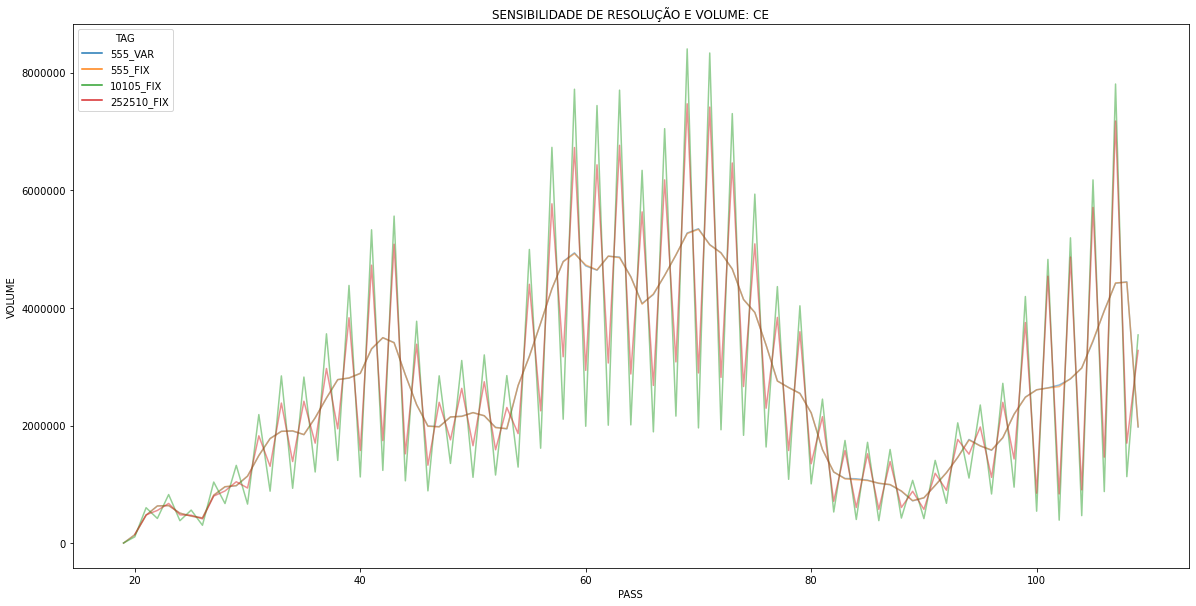

In [376]:
ROCK = 'CE'

df=SW_ALL.loc[ROCK]

fig=plt.figure(figsize=chart_size2)
sea.lineplot(x='PASS', y='VOLUME', hue='TAG', data=df, ls='-', alpha=0.5)
plt.title('SENSIBILIDADE DE RESOLUÇÃO E VOLUME: ' + ROCK)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

fig.savefig(proj + '_BMF_SWATH_VOL_'+ROCK+'.jpeg', transparent=None)


C:\Users\01517992\AppData\Local\Temp/ipykernel_1008/4203506803.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


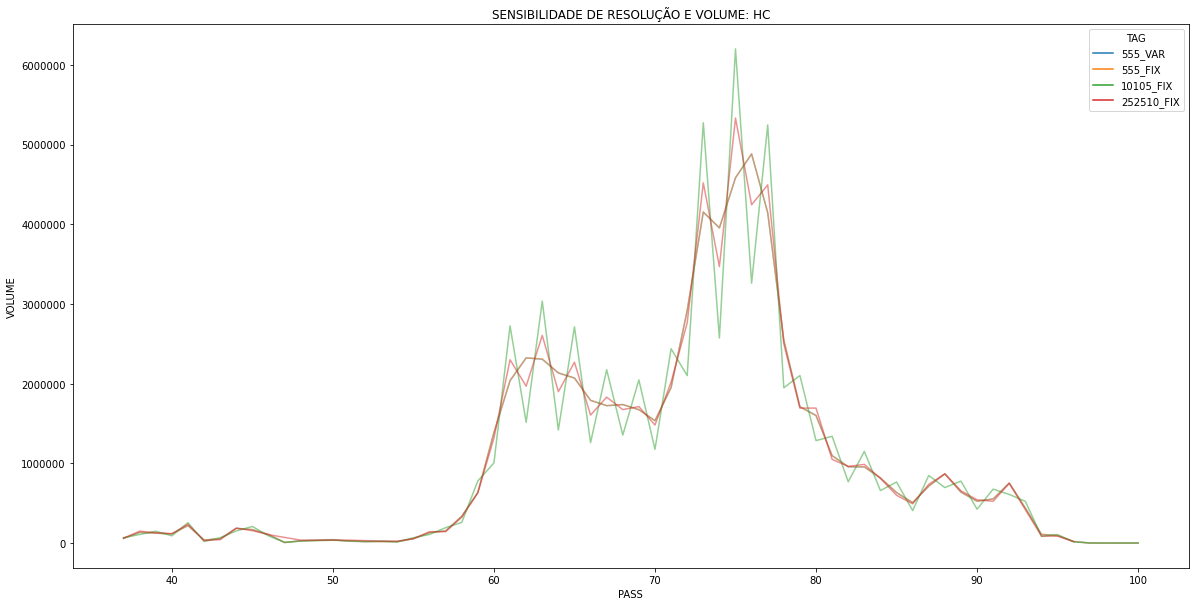

In [378]:
ROCK = 'HC'

df=SW_ALL.loc[ROCK]

fig=plt.figure(figsize=chart_size2)
sea.lineplot(x='PASS', y='VOLUME', hue='TAG', data=df, ls='-', alpha=0.5)
plt.title('SENSIBILIDADE DE RESOLUÇÃO E VOLUME: ' + ROCK)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

fig.savefig(proj + '_BMF_SWATH_VOL_'+ROCK+'.jpeg', transparent=None)

C:\Users\01517992\AppData\Local\Temp/ipykernel_1008/2685088828.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


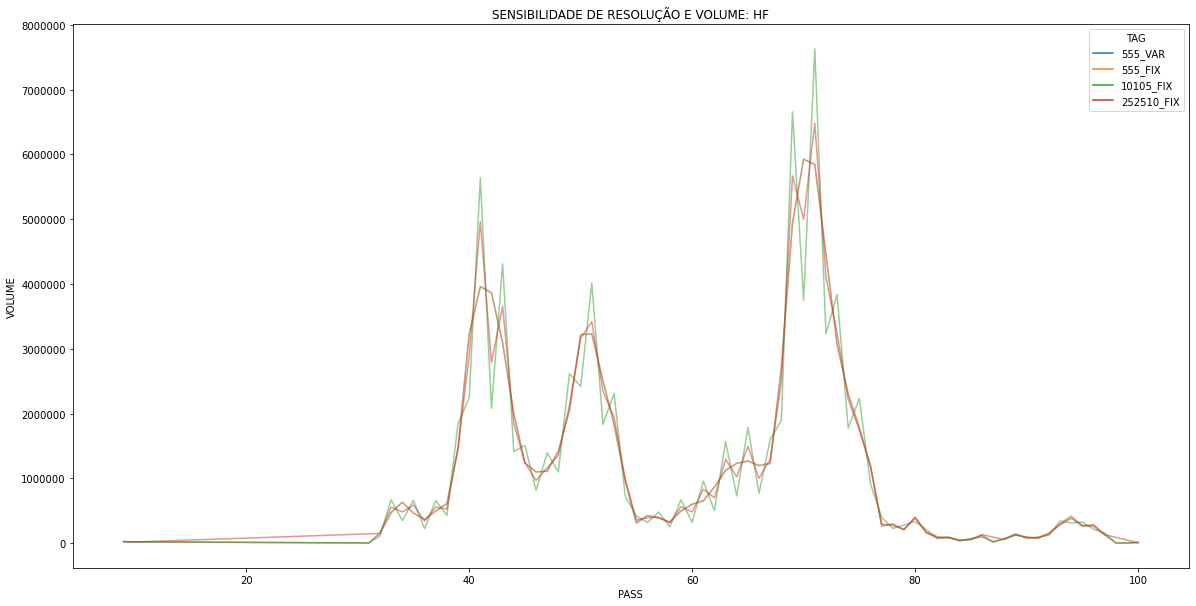

In [379]:
ROCK = 'HF'

df=SW_ALL.loc[ROCK]

fig=plt.figure(figsize=chart_size2)
sea.lineplot(x='PASS', y='VOLUME', hue='TAG', data=df, ls='-', alpha=0.5)
plt.title('SENSIBILIDADE DE RESOLUÇÃO E VOLUME: ' + ROCK)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

fig.savefig(proj + '_BMF_SWATH_VOL_'+ROCK+'.jpeg', transparent=None)

C:\Users\01517992\AppData\Local\Temp/ipykernel_1008/131908672.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


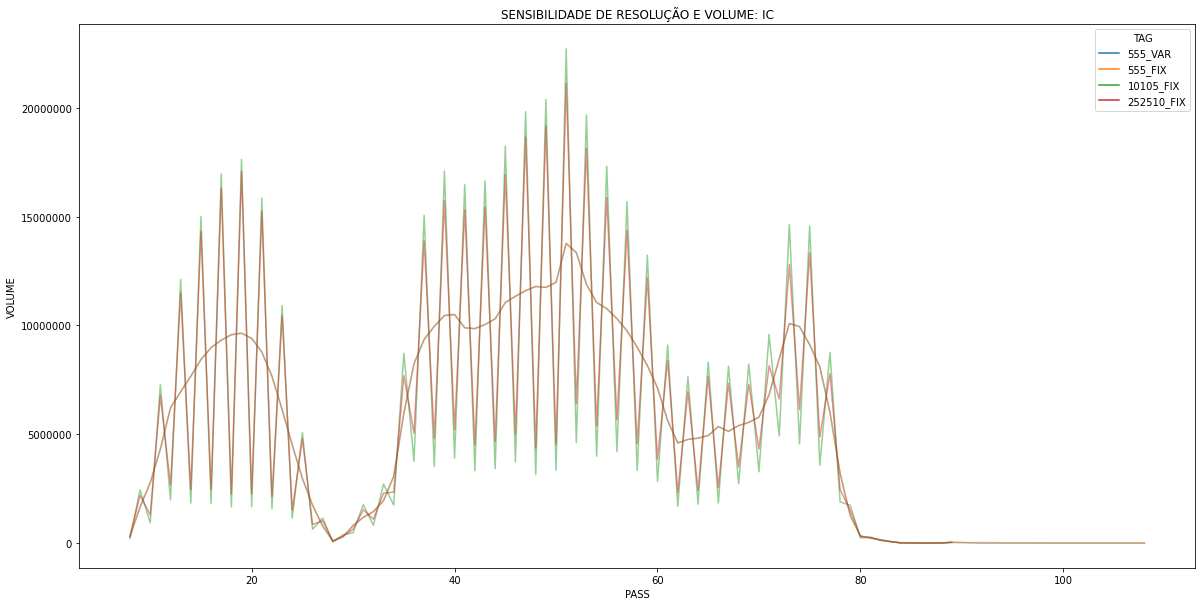

In [380]:
ROCK = 'IC'

df=SW_ALL.loc[ROCK]

fig=plt.figure(figsize=chart_size2)
sea.lineplot(x='PASS', y='VOLUME', hue='TAG', data=df, ls='-', alpha=0.5)
plt.title('SENSIBILIDADE DE RESOLUÇÃO E VOLUME: ' + ROCK)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

fig.savefig(proj + '_BMF_SWATH_VOL_'+ROCK+'.jpeg', transparent=None)

C:\Users\01517992\AppData\Local\Temp/ipykernel_1008/2527802947.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])


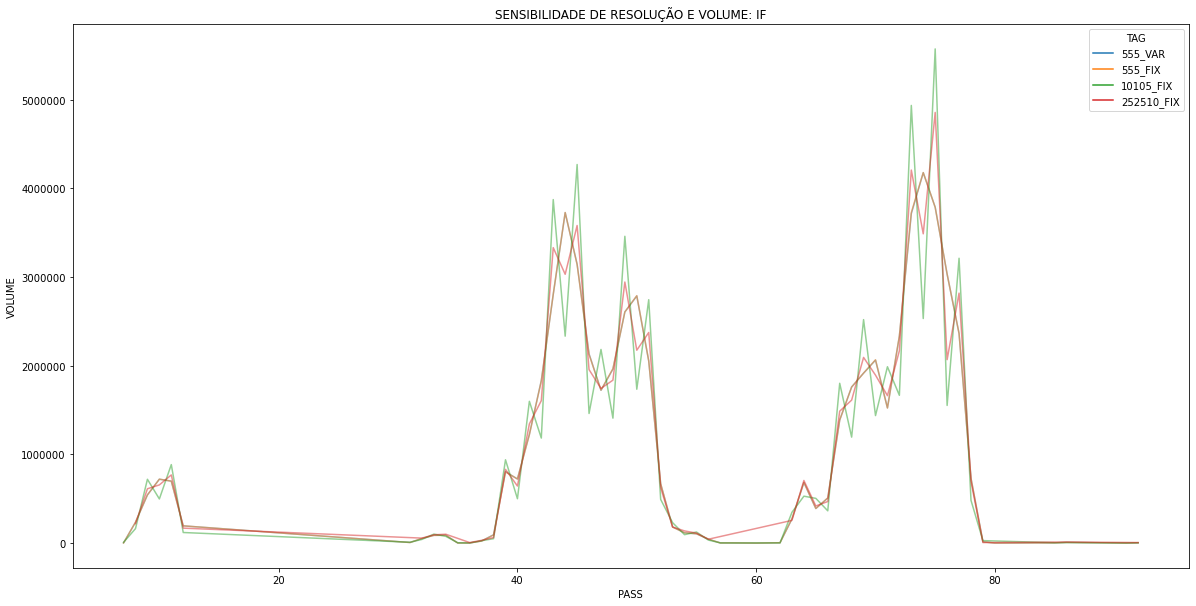

In [381]:
ROCK = 'IF'

df=SW_ALL.loc[ROCK]

fig=plt.figure(figsize=chart_size2)
sea.lineplot(x='PASS', y='VOLUME', hue='TAG', data=df, ls='-', alpha=0.5)
plt.title('SENSIBILIDADE DE RESOLUÇÃO E VOLUME: ' + ROCK)
# after plotting the data, format the labels
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in current_values])

plt.show()

fig.savefig(proj + '_BMF_SWATH_VOL_'+ROCK+'.jpeg', transparent=None)

In [126]:
#  applying style and make more readable
# https://pbpython.com/styling-pandas.html
# https://www.python.org/dev/peps/pep-0378/

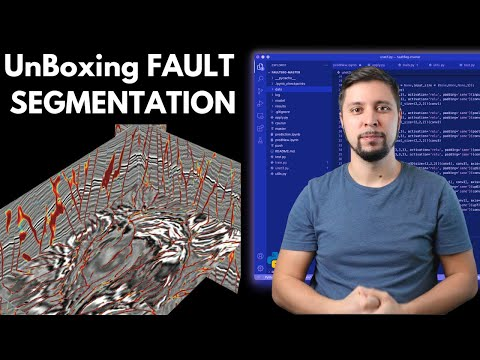

In [141]:
from IPython.display import YouTubeVideo

YouTubeVideo('18ovlxGEWBk', width=600, height=300, align="center")

In [151]:
#testing format operator
num = 10000000
print(f"{num:,}")

10,000,000


In [127]:
vol_tot

VOLUME
LITO              
CE    2.305202e+08
HC    6.553845e+07
HF    8.548618e+07
IC    5.117861e+08
IF    6.207836e+07

In [128]:
vol_tot.apply(lambda x: "{:,.0f}".format(x['VOLUME']), axis=1)


LITO
CE    230,520,169
HC     65,538,450
HF     85,486,181
IC    511,786,119
IF     62,078,356
dtype: object

In [129]:
# Note the value is a format STRING, NOT a function!
format_dict = {
    'VOLUME': '{:,.0f}'
}

# our dataframe containing the data is called contribution
vol_tot.head().style.format(format_dict)

###### GETTING VOLUMES BROKEN DOWN BY CORRIDOR AND ROCKTYPE

In [131]:
sw = pd.DataFrame(bmf555.groupby(['PASS', 'LITO']).VOLUME.sum())

In [132]:
sw.index.name

In [133]:
sw['VOLUME']

PASS   LITO
7.0    IF          2275.00
8.0    IC        304350.00
       IF        234856.25
9.0    HF         20168.75
       IC       1655387.50
       IF        542875.00
10.0   HF         22781.25
       IC       2772193.75
       IF        720587.50
11.0   IC       4324362.50
       IF        698681.25
12.0   IC       6214925.00
       IF        194525.00
13.0   IC       6950256.25
14.0   IC       7670293.75
15.0   IC       8434556.25
16.0   IC       8984962.50
17.0   IC       9325443.75
18.0   IC       9575600.00
19.0   CE          1231.25
       IC       9646181.25
20.0   CE        143631.25
       IC       9407125.00
21.0   CE        475656.25
       IC       8781693.75
22.0   CE        632393.75
       IC       7661862.50
23.0   CE        639081.25
       IC       6138200.00
24.0   CE        510293.75
       IC       4503862.50
25.0   CE        459818.75
       IC       2974775.00
26.0   CE        428737.50
       IC       1740731.25
27.0   CE        811925.00
       IC       

<AxesSubplot:xlabel='PASS', ylabel='VOLUME'>

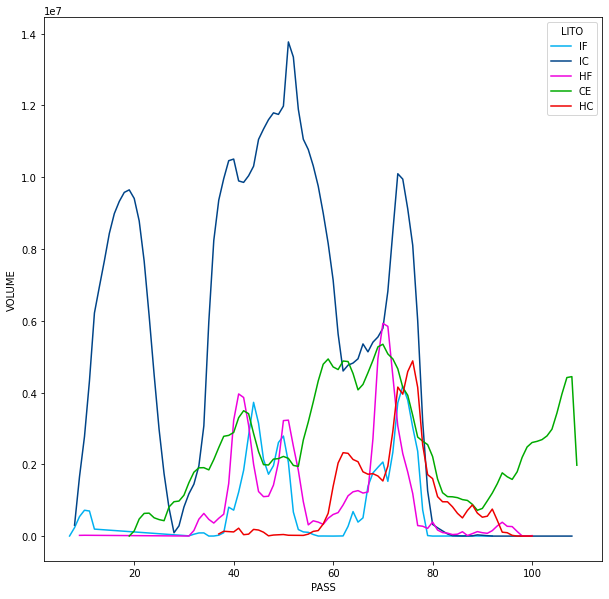

In [134]:
fig=plt.figure(figsize=chart_size)
sea.lineplot(x='PASS', y='VOLUME', hue='LITO',data=sw, palette=litocolor)

In [49]:
pi=3.6415

In [50]:
round(pi)

4

In [ ]:
base_bmf.head(5)

In [288]:
bmf.groupby('LITO').count()

CENTROID_X  CENTROID_Y  CENTROID_Z  DIM_X  DIM_Y  DIM_Z  VOLUME  \
LITO                                                                    
CE         19941       19941       19941  19941  19941  19941   19941   
CQ         45064       45064       45064  45064  45064  45064   45064   
FMN           87          87          87     87     87     87      87   
HC          2065        2065        2065   2065   2065   2065    2065   
HF         28286       28286       28286  28286  28286  28286   28286   
HMN          243         243         243    243    243    243     243   
JP         41282       41282       41282  41282  41282  41282   41282   

      LITO_3D  RECURSO   TOPO  DENS_N   MINE  FF_EXPAND  PIT_FLAG  SETOR  \
LITO                                                                       
CE      19941    19941  19941       0  19941      19941     19941  19941   
CQ      45064    45064  45064       0  45064      45064     45064  45064   
FMN        87       87     87       0     87         87        87     87   
HC       2065     2065   2065       0   2065       2065      2065   2065   
HF      28286    28286  28286       0  28286      28286     28286  28286   
HMN       243      243    243       0    243        243       243    243   
JP      41282    41282  41282       0  41282      41282     41282  41282   

      TRIDIST   AUX    ORE  XINDEX  YINDEX   FEGL   SIGL    PGL   ALGL   MNGL  \
LITO                                                                            
CE          0   158  19941   19941   19941  19941  19941  19941  19941  19941   
CQ          0  1782  45064   45064   45064  45064  45064  45064  45064  45064   
FMN         0    30     87      87      87     87     87     87     87     87   
HC          0    54   2065    2065    2065   2065   2065   2065   2065   2065   
HF          0    76  28286   28286   28286  28286  28286  28286  28286  28286   
HMN         0     0    243     243     243    243    243    243    243    243   
JP          0   393  41282   41282   41282  41282  41282  41282  41282  41282   

       PFGL   TIGL   MGGL   CAGL  FEGL_C  SIGL_C  PGL_C  ALGL_C  MNGL_C  \
LITO                                                                      
CE    19941  19941  19941  19941   19941   19941  19941   19941   19941   
CQ    45064  45064  45064  45064   45064   45064  45064   45064   45064   
FMN      87     87     87     87      87      87     87      87      87   
HC     2065   2065   2065   2065    2065    2065   2065    2065    2065   
HF    28286  28286  28286  28286   28286   28286  28286   28286   28286   
HMN     243    243    243    243     243     243    243     243     243   
JP    41282  41282  41282  41282   41282   41282  41282   41282   41282   

      PFGL_C  TIGL_C  MGGL_C  CAGL_C  G1    G1A    G1B     G2     G3  AFE1  \
LITO                                                                         
CE     19941   19941   19941   19941   0  19941  19941  19941  19941     0   
CQ     45064   45064   45064   45064   0  45064  45064  45064  45064     0   
FMN       87      87      87      87   0     87     87     87     87     0   
HC      2065    2065    2065    2065   0   2065   2065   2065   2065     0   
HF     28286   28286   28286   28286   0  28286  28286  28286  28286     0   
HMN      243     243     243     243   0    243    243    243    243     0   
JP     41282   41282   41282   41282   0  41282  41282  41282  41282     0   

      ASI1  AP1  AAL1  AMN1  APF1  ATI1  AMG1  ACA1  AFE1A  ASI1A   AP1A  \
LITO                                                                       
CE       0    0     0     0     0     0     0     0  19941  19941  19941   
CQ       0    0     0     0     0     0     0     0  45064  45064  45064   
FMN      0    0     0     0     0     0     0     0     87     87     87   
HC       0    0     0     0     0     0     0     0   2065   2065   2065   
HF       0    0     0     0     0     0     0     0  28286  28286  28286   
HMN      0    0     0 

In [289]:
base_bmf.LITO_3D.unique()

array(['MS', 'FAC', 'JP', 'MSD', 'MD', 'HF', 'HC', 'CQ', 'BR', 'FMN',
       'CE', 'HMN'], dtype=object)

In [290]:
#base bmf volume
vol_bmf = base_bmf.loc[0:, ['VOLUME', 'LITO_3D']]
total_vol = vol_bmf.groupby('LITO_3D').sum()


In [291]:
total_vol.to_csv('sn3_1121_vol_by_lito.csv')

In [292]:
bmf_gl = bmf.loc[0:, ['LITO'] + teores_gl]

In [293]:
bmf_gl.head(5)

LITO       FEGL       SIGL       PGL      ALGL      MNGL     PFGL      TIGL  \
0   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   
1   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   
2   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   
3   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   
4   JP  32.877792  50.220467  0.021218  0.261688  0.054147  1.22108  0.071073   

       MGGL      CAGL  
0  0.026181  0.017441  
1  0.026181  0.017441  
2  0.026181  0.017441  
3  0.026181  0.017441  
4  0.026181  0.017441

In [294]:
VCOUNT = bmf_gl.count()

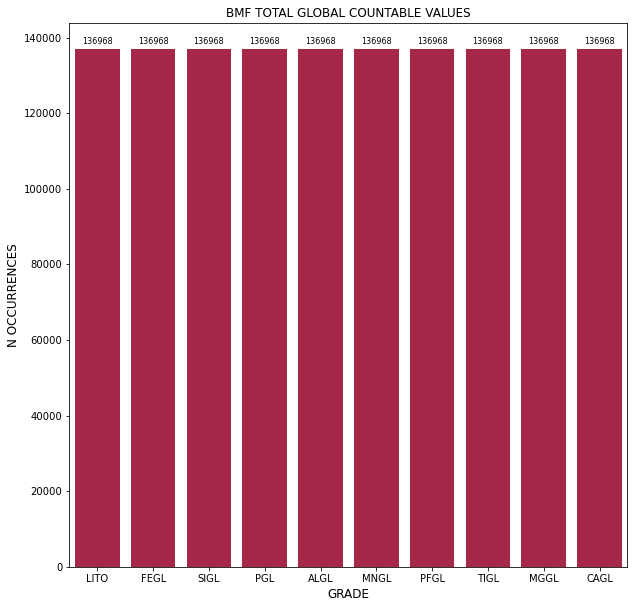

In [295]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=VCOUNT.index, y=VCOUNT.values, color=valecolor['VERMELHO'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('BMF TOTAL GLOBAL COUNTABLE VALUES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('GRADE', fontsize=12)

plt.show()

fig.savefig(proj + '_BMF_GLOBAL_GRADE_counts.jpeg', transparent=None)

In [296]:
fac_krig = fac.loc[0:,  v_krig]

In [297]:
VCOUNT = fac_krig.count()

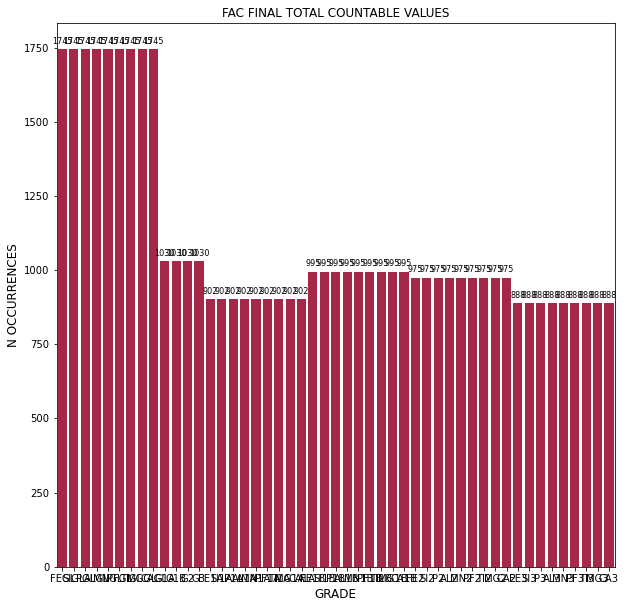

In [298]:
fig=plt.figure(figsize=chart_size)

plots=sea.barplot(x=VCOUNT.index, y=VCOUNT.values, color=valecolor['VERMELHO'])

# ITERATING OVER THE THE BARS
for bar in plots.patches:
    # Using Matplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0F'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')

plt.title('FAC FINAL TOTAL COUNTABLE VALUES')
plt.ylabel('N OCCURRENCES', fontsize=12)
plt.xlabel('GRADE', fontsize=12)

plt.show()

fig.savefig(proj + '_FAC_FINAL_counts.jpeg', transparent=None)

In [299]:
fac_krig.describe()

FEGL         SIGL          PGL         ALGL         MNGL  \
count  1745.000000  1745.000000  1745.000000  1745.000000  1745.000000   
mean     48.952790    14.620715     0.058869     8.337221     0.341769   
std      19.021227    20.142563     0.074592     9.967485     0.809084   
min       7.330000     0.056000     0.002000     0.048000     0.005000   
25%      33.300000     0.568000     0.015000     1.033000     0.050000   
50%      58.433000     1.638000     0.030000     2.740000     0.085000   
75%      65.839000    29.600000     0.070000    14.800000     0.270000   
max      69.410000    72.119000     0.628000    45.750000    10.232000   

              PFGL         TIGL         MGGL         CAGL          G1A  \
count  1745.000000  1745.000000  1745.000000  1745.000000  1030.000000   
mean      4.984053     0.465589     0.588074     0.085121    36.340429   
std       5.248942     0.614510     1.960599     0.524862    33.972945   
min       0.030000     0.006000     0.002000     0.003000     0.000000   
25%       1.200000     0.053000     0.031000     0.013000     3.485000   
50%       2.421000     0.103000     0.047000     0.017000    25.950000   
75%       7.330000     0.803000     0.100000     0.024000    66.352500   
max      25.280000     3.770000    15.700000    10.036000   100.000000   

               G1B           G2           G3        FE1A        SI1A  \
count  1030.000000  1030.000000  1030.000000  902.000000  902.000000   
mean     12.412803    38.808994    12.439884   54.272666   10.822310   
std       6.750930    24.322741    11.281755   13.020721   18.458471   
min       0.000000     0.000000     0.000000    9.680000    0.050000   
25%       7.366500    15.459500     2.405000   42.232500    0.430000   
50%      12.350000    44.258500     9.400000   59.990000    0.740000   
75%      17.242250    61.400000    20.837500   65.438750    7.457500   
max      78.099000    90.900000    53.810000   69.440000   75.490000   

              P1A        AL1A        MN1A        PF1A        TI1A        MG1A  \
count  902.000000  902.000000  902.000000  902.000000  902.000000  902.000000   
mean     0.058233    5.951507    0.434930    4.266798    0.273582    0.081351   
std      0.076671    8.001045    1.564706    4.781859    0.438037    0.294561   
min      0.002000    0.020000    0.004000    0.030000    0.006000    0.007000   
25%      0.012000    0.720000    0.040000    0.990000    0.044000    0.025000   
50%      0.029000    2.576000    0.060000    2.560000    0.072000    0.046000   
75%      0.072000    7.165000    0.129250    5.167500    0.267500    0.077750   
max      0.646000   44.660000   15.700000   24.390000    3.575000    6.449000   

             CA1A        FE1B        SI1B         P1B        AL1B        MN1B  \
count  902.000000  995.000000  995.000000  995.000000  995.000000  995.000000   
mean     0.037877   57.442148    7.765501    0.052739    5.270289    0.329493   
std      0.408912   12.956265   15.733795    0.077557    8.314691    1.066785   
min      0.001000    9.770000    0.030000    0.002000    0.040000    0.004000   
25%      0.010000   49.550000    0.430000    0.011000    0.710000    0.040000   
50%      0.014000   64.020000    0.720000    0.021000    1.870000    0.063000   
75%      0.019000   66.861000    2.550000    0.055500    4.840000    0.130000   
max     10.759000   69.460000   70.300000    0.601000   45.790000   14.059000   

             PF1B        TI1B        MG1B        CA1B         FE2         SI2  \
count  995.000000  995.000000  995.000000  995.000000  975.000000  975.000000   
mean     3.712554    0.253702    0.077268    0.033981   57.519168    7.700249   
std      4.963654    0.431837    0.323164    0.337897   13.249237   15.511153   
min      0.010000    0.006000    0.001000    0.002000    9.421000    0.053000   
25%      0.870000    0.042000    0.025000    0.011000   50.487500    0.507000   
50%      1.720000    0.068000    0.035000    0.014000   64.463000    0.861000   
75% 

<AxesSubplot:xlabel='LENGTH', ylabel='Count'>

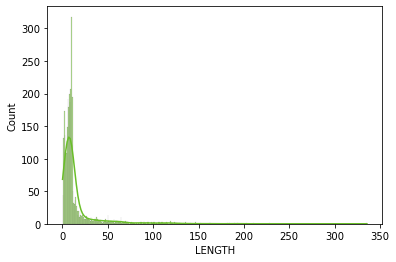

In [300]:
# HISTOGRAMA DE LENGTH
sea.histplot(data=fac, x="LENGTH", color=valecolor['VERDE2'], kde=True)

In [301]:
fac_sampled = fac[~fac['FEGL'].isna()]

In [302]:
import ipywidgets as widgets

In [303]:
sl=widgets.IntSlider(
    value=2,
    min=0,
    max=10,
    step=1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [304]:
def make_kde(bw):
    sea.kdeplot(data=fac, x="LENGTH", color=valecolor['VERDE2'], bw_adjust=bw)

interactive(children=(FloatSlider(value=2.5000000000000004, description='bw', max=5.0, min=0.1), Output()), _d…

<function __main__.make_kde(bw)>

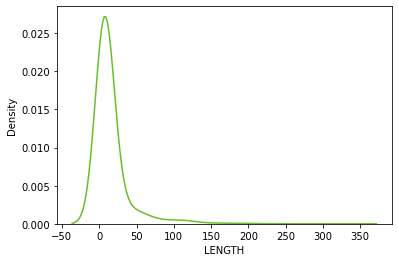

In [305]:
widgets.interact(make_kde, bw=(0.1,5,0.1))

<AxesSubplot:xlabel='LENGTH', ylabel='Count'>

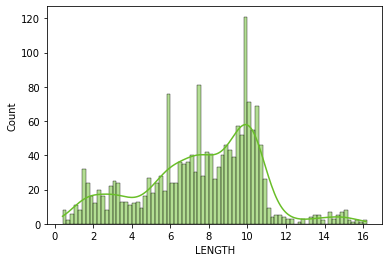

In [306]:
sea.histplot(data=fac_sampled, x="LENGTH", color=valecolor['VERDE2'], binwidth=0.2,kde=True)

In [307]:
bmf_gl.describe()

FEGL           SIGL            PGL           ALGL  \
count  136968.000000  136968.000000  136968.000000  136968.000000   
mean       49.441070      13.304019       0.075242       8.662822   
std        12.684295      19.342976       0.076701       9.962142   
min        16.415726       0.137378       0.002492       0.081567   
25%        38.955875       0.579287       0.014017       1.018666   
50%        45.906712       1.229977       0.034554       2.727524   
75%        63.876519      31.383811       0.122038      19.008227   
max        68.536018      65.376717       0.530436      38.396362   

                MNGL           PFGL           TIGL           MGGL  \
count  136968.000000  136968.000000  136968.000000  136968.000000   
mean        0.185258       5.918178       0.499236       0.118582   
std         0.399258       5.983248       0.570618       0.240566   
min        -0.477821       0.085368       0.006000       0.012659   
25%         0.043802       1.043169       0.058494       0.037231   
50%         0.069894       2.749101       0.151302       0.056393   
75%         0.145920      12.372250       0.990679       0.122146   
max         8.904000      22.135666       2.982000       3.312431   

                CAGL  
count  136968.000000  
mean        0.067111  
std         0.469473  
min         0.003456  
25%         0.012704  
50%         0.014638  
75%         0.018819  
max        10.036192

In [308]:
fso = fso[~fso['CLI'].isin(['SR', 'DT', 'BR'])]
fac = fac[~fac['CLI'].isin(['SR', 'DT', 'BR'])]
cac = cac[~cac['GEOCOD'].isin(['SR', 'DT', 'BR'])]

cac_hem = cac[cac['GEOCOD'].isin(['HC', 'HF'])]

In [309]:
cac_hem

COMPID         DHID        MIDX         MIDY     MIDZ  LENGTH    FROM  \
5     15MFLP      N3-0001  586895.431  9332336.874  650.324   11.05   21.10   
6     15MFLP      N3-0001  586895.431  9332336.874  644.149    1.30   32.15   
7     15MFLP      N3-0001  586895.431  9332336.874  638.854    9.29   33.45   
8     15MFLP      N3-0001  586895.431  9332336.874  633.654    1.11   42.74   
15    15MFLP      N3-0002  586498.534  9331934.449  641.464   10.38    6.16   
16    15MFLP      N3-0002  586498.534  9331934.449  632.229    8.09   16.54   
18    15MFLP      N3-0002  586498.534  9331934.449  627.434    0.50   25.13   
20    15MFLP      N3-0002  586498.534  9331934.449  626.434    0.50   26.13   
22    15MFLP      N3-0002  586498.534  9331934.449  623.259    5.05   27.03   
24    15MFLP      N3-0002  586498.534  9331934.449  617.899    4.47   32.68   
25    15MFLP      N3-0002  586498.534  9331934.449  614.014    3.30   37.15   
26    15MFLP      N3-0002  586498.534  9331934.449  609.174    6.38   40.45   
28    15MFLP      N3-0002  586498.534  9331934.449  604.399    1.61   47.61   
29    15MFLP      N3-0002  586498.534  9331934.449  602.444    2.30   49.22   
31    15MFLP      N3-0002  586498.534  9331934.449  599.924    1.64   52.07   
32    15MFLP      N3-0002  586498.534  9331934.449  597.304    3.60   53.71   
34    15MFLP      N3-0002  586498.534  9331934.449  591.054    7.20   58.16   
37    15MFLP      N3-0002  586498.534  9331934.449  581.404    6.80   68.01   
39    15MFLP      N3-0002  586498.534  9331934.449  576.554    0.60   75.96   
41    15MFLP      N3-0002  586498.534  9331934.449  574.424    1.66   77.56   
42    15MFLP      N3-0002  586498.534  9331934.449  572.204    2.78   79.22   
43    15MFLP      N3-0002  586498.534  9331934.449  569.864    1.90   82.00   
49    15MFLP      N3-0003  586898.687  9331736.706  655.150   10.31    6.22   
50    15MFLP      N3-0003  586898.687  9331736.706  649.195    1.60   16.53   
51    15MFLP      N3-0003  586898.687  9331736.706  647.645    1.50   18.13   
53    15MFLP      N3-0003  586898.687  9331736.706  645.650    1.29   20.23   
54    15MFLP      N3-0003  586898.687  9331736.706  644.255    1.50   21.52   
56    15MFLP      N3-0003  586898.687  9331736.706  641.255    1.50   24.52   
57    15MFLP      N3-0003  586898.687  9331736.706  637.640    5.73   26.02   
59    15MFLP      N3-0003  586898.687  9331736.706  632.455    1.00   33.57   
61    15MFLP      N3-0003  586898.687  9331736.706  627.780    7.35   35.07   
63    15MFLP      N3-0003  586898.687  9331736.706  623.320    1.43   42.49   
64    15MFLP      N3-0003  586898.687  9331736.706  622.355    0.50   43.92   
65    15MFLP      N3-0003  586898.687  9331736.706  618.405    7.40   44.42   
66    15MFLP      N3-0003  586898.687  9331736.706  613.155    3.10   51.82   
67    15MFLP      N3-0003  586898.687  9331736.706  610.905    1.40   54.92   
68    15MFLP      N3-0003  586898.687  9331736.706  607.855    4.70   56.32   
70    15MFLP      N3-0003  586898.687  9331736.706  604.405    1.00   61.62   
72    15MFLP      N3-0003  586898.687  9331736.706  602.355    1.10   63.62   
78    15MFLP      N3-0003  586898.687  9331736.706  588.745    1.02   77.27   
79    15MFLP      N3-0003  586898.687  9331736.706  586.735    3.00   78.29   
80    15MFLP      N3-0003  586898.687  9331736.706  584.160    2.15   81.29   
81    15MFLP      N3-0003  586898.687  9331736.706  581.215    3.74   83.44   
82    15MFLP      N3-0003  586898.687  9331736.706  578.695    1.30   87.18   
83    15MFLP      N3-0003  586898.687  9331736.706  577.195    1.70   88.48   
86    15MFLP      N3-0003  586898.687  9331736.706  571.215    1.90   94.36   
87    15MFLP      N3-0003  586898.687  9331736.706  567.865    4.80   96.26   
89    15MFLP      N3-0003  586898.687  9331736.706  561.355    2.90  103.72   
90    15MFLP      N3-0003  586898.687  9331736.706  552.405   15.00  106.62   
91    15MFLP      N3-0003  586898.687  9331736.706  542.

<AxesSubplot:xlabel='FEGL', ylabel='Count'>

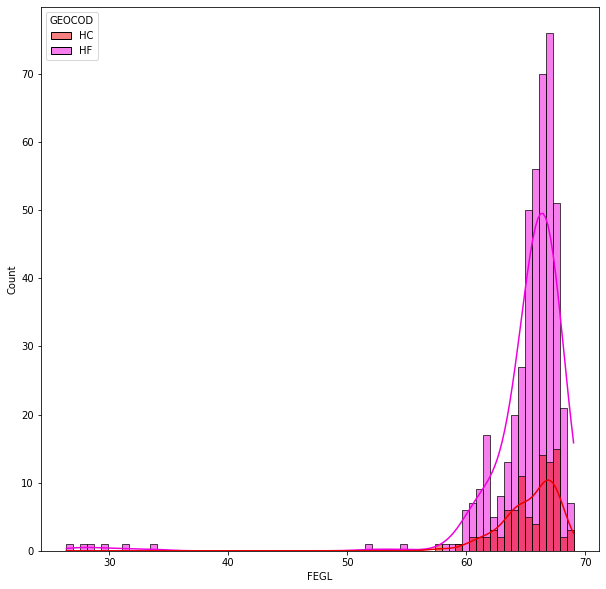

In [310]:
fig=plt.figure(figsize=chart_size)

sea.histplot(data= cac_hem, x=cac_hem['FEGL'], hue=cac_hem['GEOCOD'], palette=litocolor, kde=True)

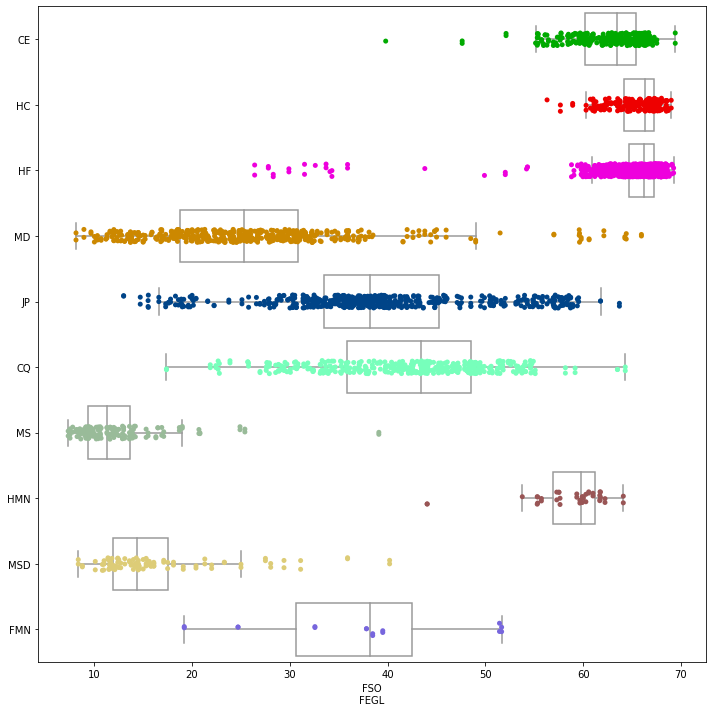

In [311]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
sea.boxplot(x=fso.FEGL, y=fso.CLI, color='white', fliersize=0)
sea.stripplot(x=fso.FEGL, y=fso.CLI, palette=litocolor)
sea.stripplot(x=fac.FEGL, y=fac.CLI, palette=litocolor)
plt.xlabel('FSO\nFEGL')
plt.ylabel('')
#plt.yticks([0, 1, 2], ['USA', 'Europe', 'Japan'])
plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\categorical.py:1138: UserWarning: You passed a edgecolor/edgecolors ('#292929') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(strip_data, cat_pos, **kws)


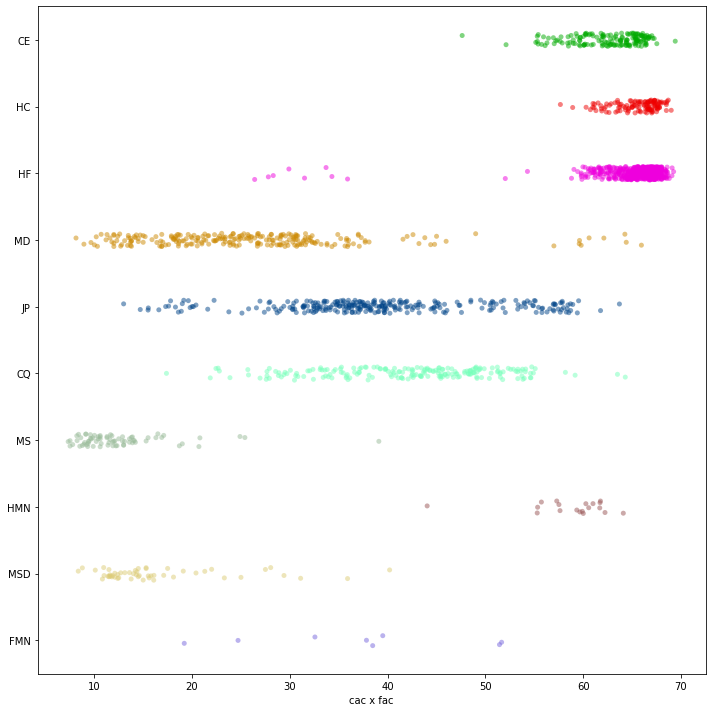

In [312]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
#sea.boxplot(x=fso.FEGL, y=fso.CLI, color='white', fliersize=0)
sea.stripplot(x=cac['FEGL'], y=cac['GEOCOD'], palette=litocolor, marker='+')
sea.stripplot(x=fac.FEGL, y=fac.CLI, palette=litocolor, alpha = 0.5)
plt.xlabel('cac x fac')
plt.ylabel('')
#plt.yticks([0, 1, 2], ['USA', 'Europe', 'Japan'])
plt.tight_layout();

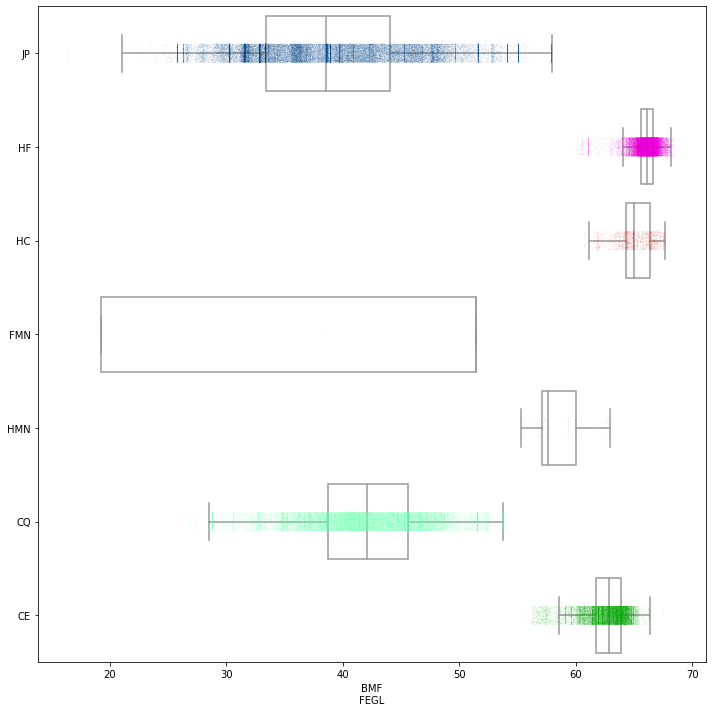

In [313]:
fig=plt.figure(figsize=chart_size)

#sea.boxplot(x=fso.FEGL, y=fso.CLI, whis=0, color='white', fliersize=0)
sea.boxplot(x=bmf.FEGL, y=bmf.LITO, color='white', fliersize=0)
#sea.stripplot(x=bmf.FEGL, y=bmf.LITO, palette=litocolor)
sea.stripplot(x=bmf.FEGL, y=bmf.LITO, palette=litocolor,  size=0.3)
plt.xlabel('BMF\nFEGL')
plt.ylabel('')

plt.tight_layout();

In [368]:
fig=plt.figure(figsize=chart_size)
grade='FEGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)

plt.tight_layout();

ValueError: The palette dictionary is missing keys: {'CO'}

<Figure size 720x720 with 0 Axes>

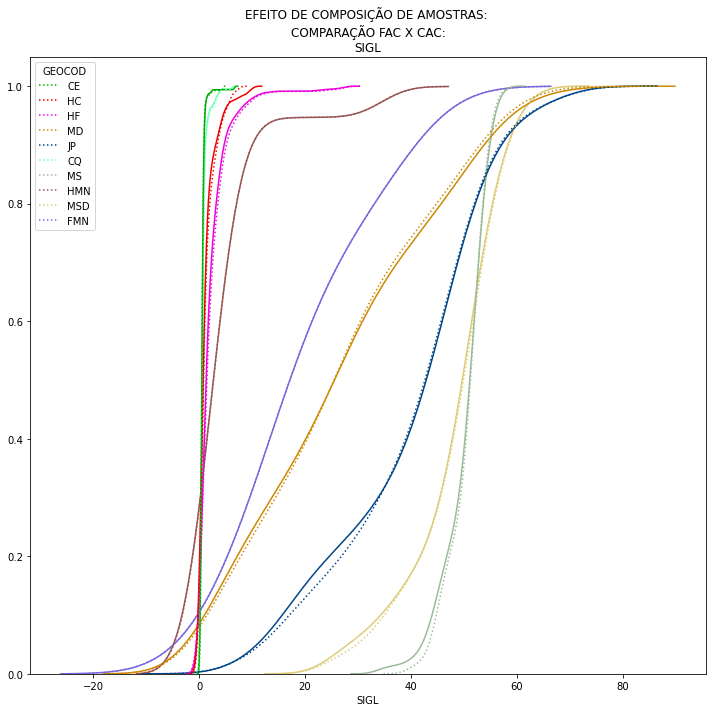

In [315]:
fig=plt.figure(figsize=chart_size)
grade='SIGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

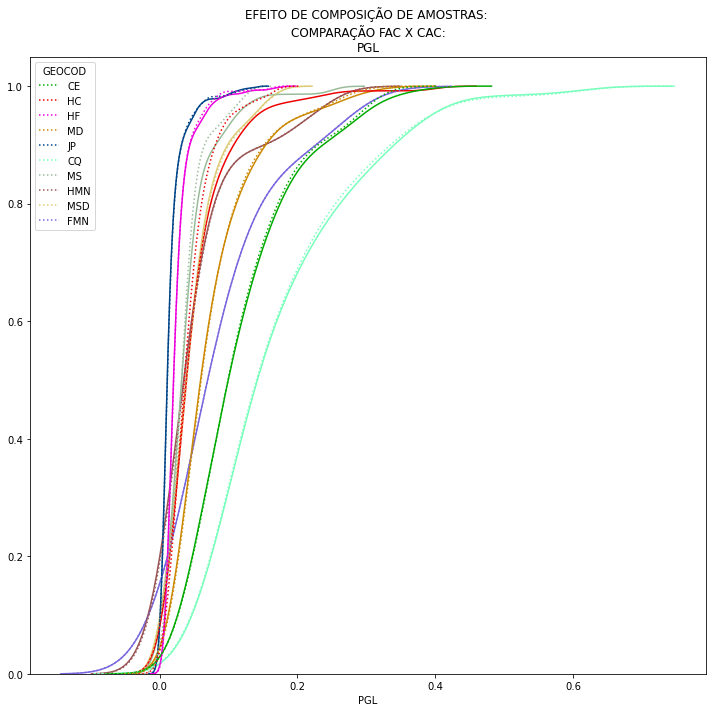

In [316]:
fig=plt.figure(figsize=chart_size)
grade='PGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

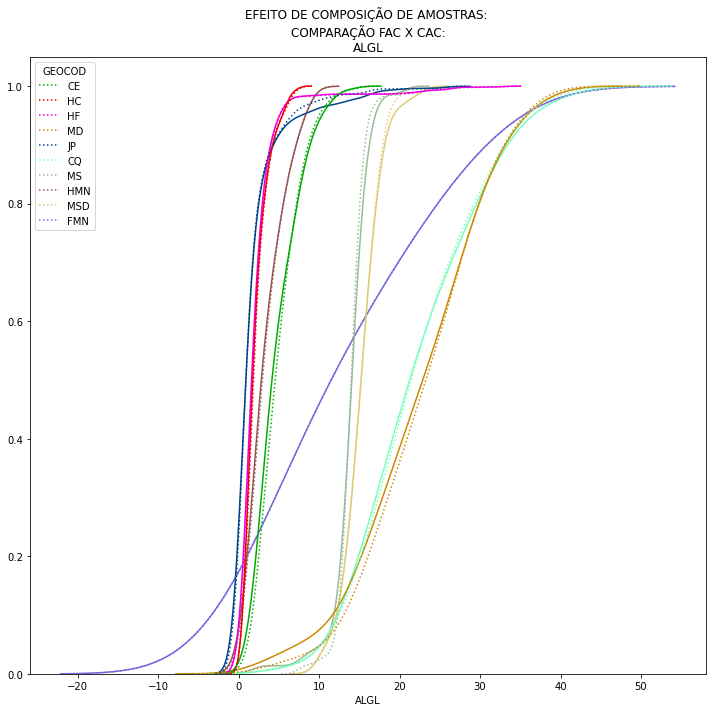

In [317]:
fig=plt.figure(figsize=chart_size)
grade='ALGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

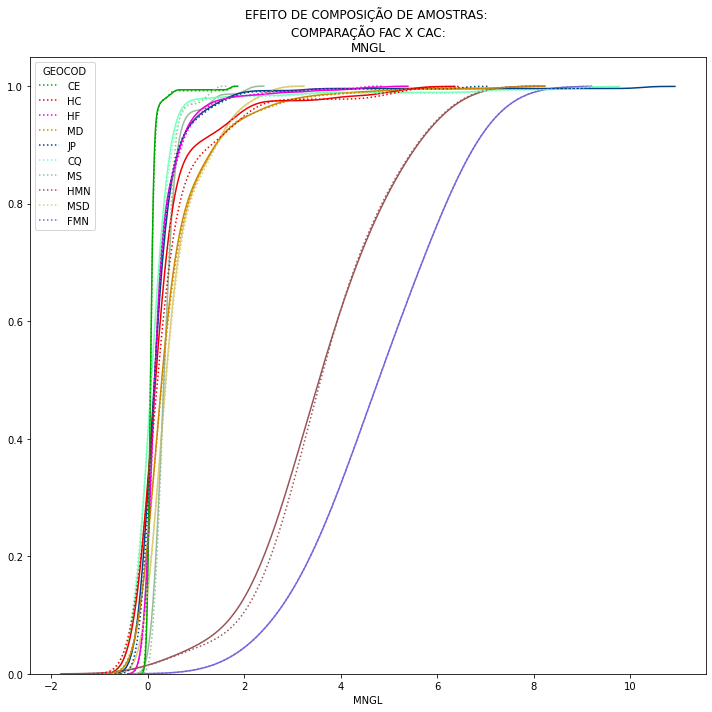

In [318]:
fig=plt.figure(figsize=chart_size)
grade='MNGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

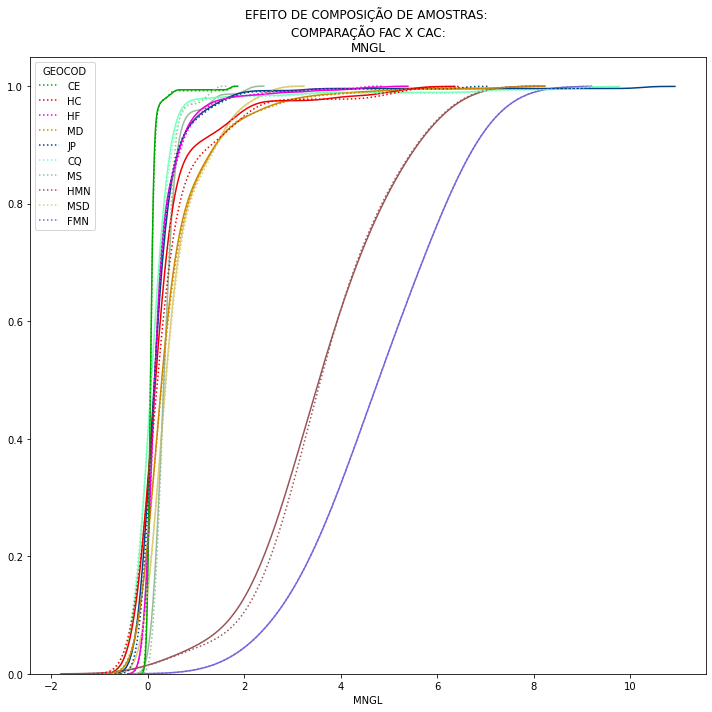

In [319]:
fig=plt.figure(figsize=chart_size)
grade='MNGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

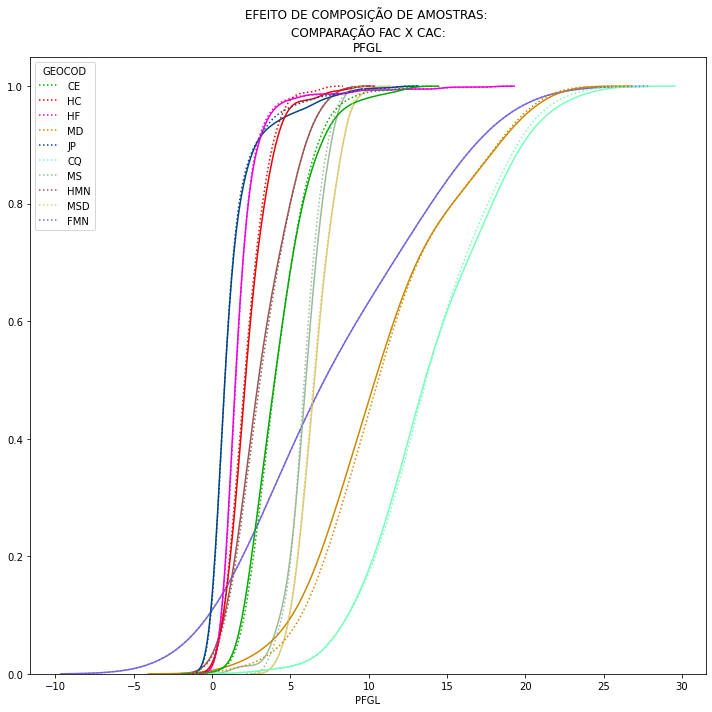

In [320]:
fig=plt.figure(figsize=chart_size)
grade='PFGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

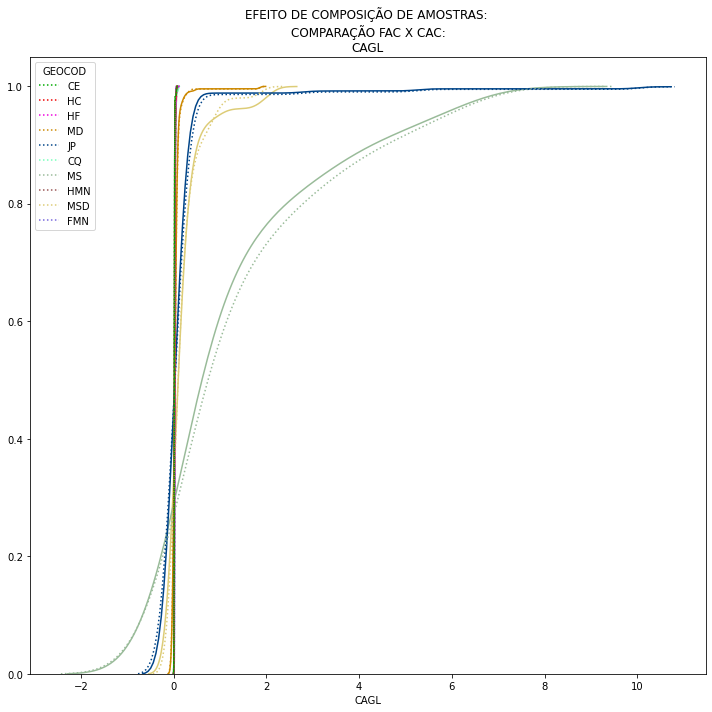

In [321]:
fig=plt.figure(figsize=chart_size)
grade='CAGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

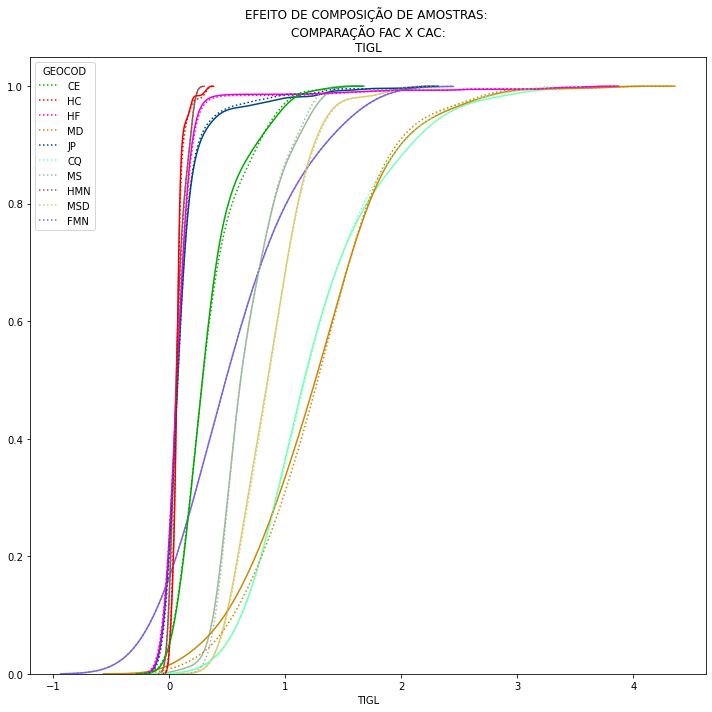

In [322]:
fig=plt.figure(figsize=chart_size)
grade='TIGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

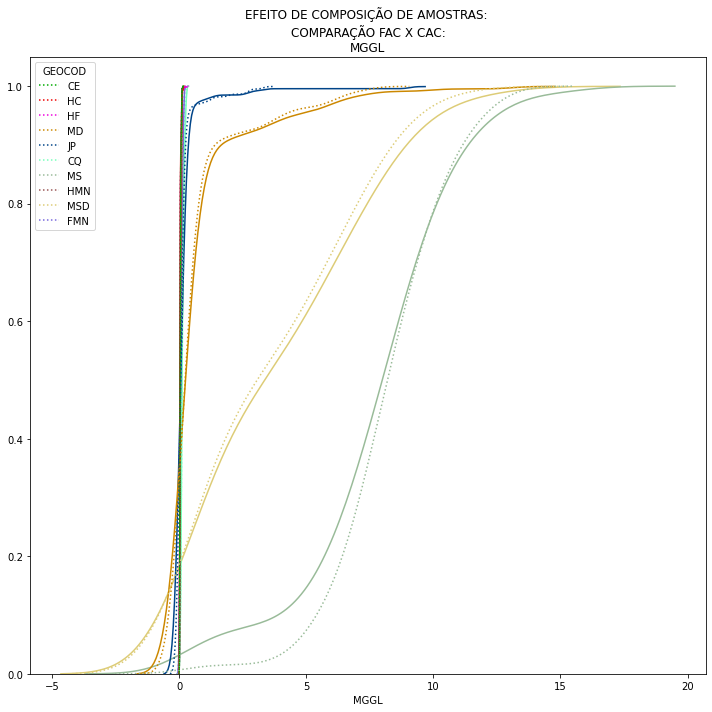

In [323]:
fig=plt.figure(figsize=chart_size)
grade='MGGL'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


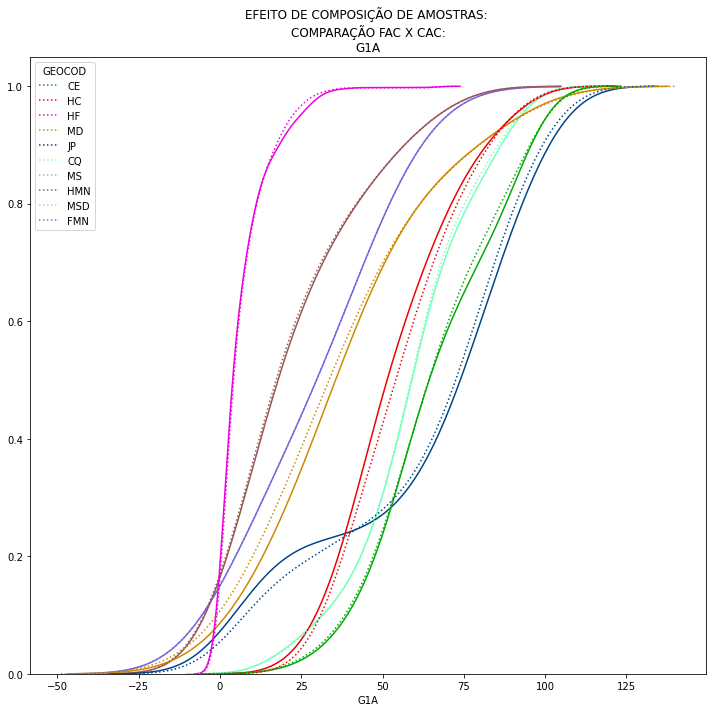

In [324]:
fig=plt.figure(figsize=chart_size)
grade='G1A'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


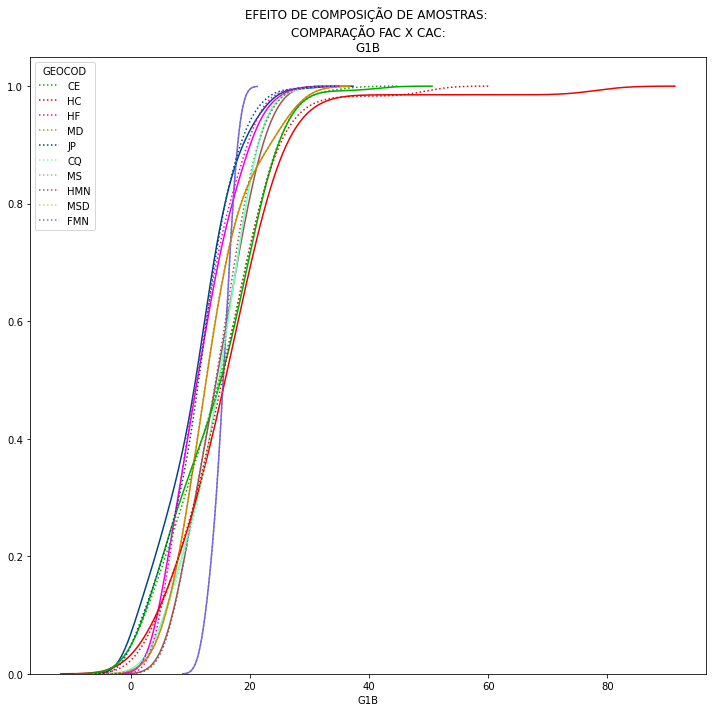

In [325]:
fig=plt.figure(figsize=chart_size)
grade='G1B'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


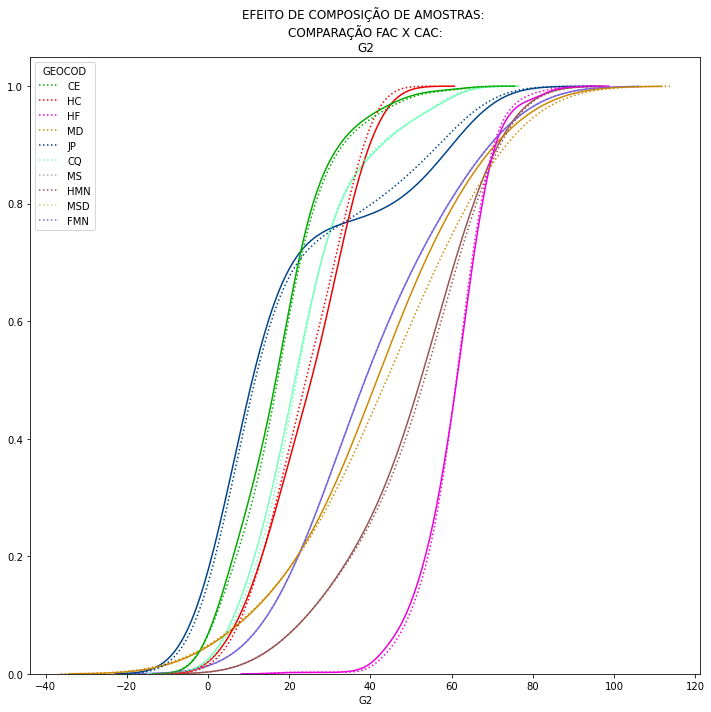

In [326]:
fig=plt.figure(figsize=chart_size)
grade='G2'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\DADOS\CONDA3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


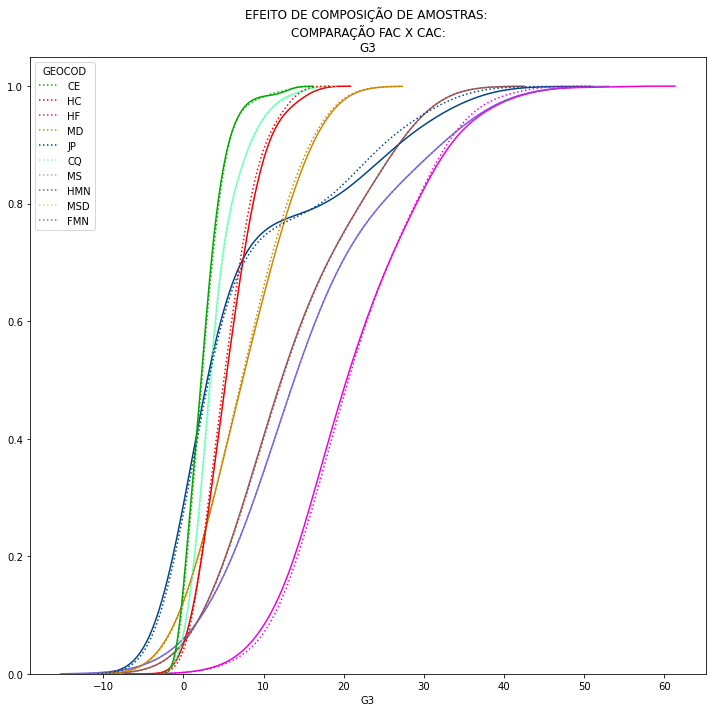

In [327]:
fig=plt.figure(figsize=chart_size)
grade='G3'

sea.kdeplot(data=fac, x=fac[grade], hue='CLI', cumulative=True, common_norm=False, palette=litocolor)
sea.kdeplot(data=cac, x=cac[grade], hue='GEOCOD', cumulative=True, common_norm=False, palette=litocolor, alpha=0.5, ls=":")

plt.title('EFEITO DE COMPOSIÇÃO DE AMOSTRAS: \nCOMPARAÇÃO FAC X CAC:\n' + grade)
plt.xlabel(grade)
plt.ylabel('')

fig.savefig(proj + '_COMPARA_FAC_CAC_'+ grade +'.jpeg', transparent=None)


plt.tight_layout();

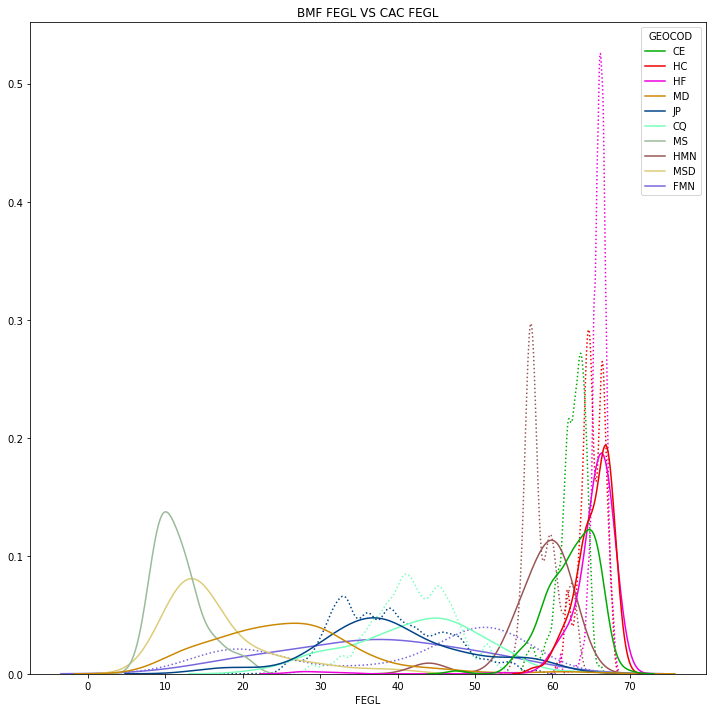

In [328]:
fig=plt.figure(figsize=chart_size)

sea.kdeplot(data=bmf, x=bmf.FEGL, hue='LITO',  common_norm=False, palette=litocolor, alpha=0.5, ls=":")
sea.kdeplot(data=cac, x=cac.FEGL, hue='GEOCOD',  common_norm=False, palette=litocolor)
plt.title('BMF FEGL VS CAC FEGL')
plt.xlabel('FEGL')
plt.ylabel('')

plt.tight_layout();